In [1]:
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

In [11]:
# Function to get the data from XML Annotation
def extract_info_from_xml(xml_file):
    root = ET.parse(xml_file).getroot()
    
    # Initialise the info dict 
    info_dict = {}
    info_dict['bboxes'] = []

    # Parse the XML Tree
    for elem in root:
        # Get the file name 
        if elem.tag == "filename":
            info_dict['filename'] = elem.text
            
        # Get the image size
        elif elem.tag == "size":
            image_size = []
            for subelem in elem:
                image_size.append(int(subelem.text))
            
            info_dict['image_size'] = tuple(image_size)
        
        # Get details of the bounding box 
        elif elem.tag == "object":
            bbox = {}
            for subelem in elem:
                if subelem.tag == "name":
                    bbox["class"] = subelem.text
                    
                elif subelem.tag == "bndbox":
                    for subsubelem in subelem:
                        bbox[subsubelem.tag] = int(subsubelem.text)            
            info_dict['bboxes'].append(bbox)
    
    return info_dict

In [3]:
print(extract_info_from_xml('labels/bicycle (1).xml'))

{'bboxes': [{'class': 'bicycle', 'xmin': 592, 'ymin': 296, 'xmax': 619, 'ymax': 407}, {'class': 'bicycle', 'xmin': 422, 'ymin': 282, 'xmax': 455, 'ymax': 366}, {'class': 'bicycle', 'xmin': 362, 'ymin': 297, 'xmax': 409, 'ymax': 397}, {'class': 'bicycle', 'xmin': 194, 'ymin': 305, 'xmax': 370, 'ymax': 523}, {'class': 'bicycle', 'xmin': 465, 'ymin': 324, 'xmax': 563, 'ymax': 560}], 'filename': 'bicycle (1).jpg', 'image_size': (620, 618, 3)}


In [12]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {'bicycle': 0, 
                            'bus': 1,
                            'car': 2,
                            'cng': 3,
                            'bike': 4,
                            'truck': 5}

# Convert the info dict to the required yolo format and write it to disk
def convert_to_yolov5(info_dict):
    print_buffer = []
    
    # For each bounding box
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print(f"Invalid Class {b['class']} at {info_dict['filename']}. Must be one from ", class_name_to_id_mapping.keys())
            continue
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        try: 
            image_w, image_h, image_c = info_dict["image_size"]  
            b_center_x /= image_w 
            b_center_y /= image_h 
            b_width    /= image_w 
            b_height   /= image_h 
        except ZeroDivisionError:
            print(f"ZeroDivisionError at {info_dict['filename']}")
        
        #Write the bbox details to the file 
        print_buffer.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save 
    save_file_name = os.path.join("labels", info_dict["filename"].replace("jpg", "txt"))
    
    # Save the annotation to disk
    print("\n".join(print_buffer), file= open(save_file_name, "w"))

In [15]:
# Get the annotations
annotations = [os.path.join('labels', x) for x in os.listdir('labels') if x[-3:] == "xml"]
annotations.sort()

# Convert and save the annotations
for ann in tqdm(annotations):
    info_dict = extract_info_from_xml(ann)
    convert_to_yolov5(info_dict)

  3%|██▏                                                                           | 112/3994 [00:00<00:10, 365.73it/s]

Invalid Class easybike at bicycle (133).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (151).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (151).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (158).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


  5%|███▋                                                                          | 188/3994 [00:00<00:10, 370.16it/s]

Invalid Class boat at bicycle (214).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bicycle (217).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bicycle (217).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (235).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (24).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


  7%|█████▏                                                                        | 265/3994 [00:00<00:09, 374.77it/s]

Invalid Class rickshaw at bicycle (30).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (308).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (308).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (308).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (344).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bicycle (347).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 10%|███████▍                                                                      | 381/3994 [00:01<00:09, 364.33it/s]

Invalid Class boat at bicycle (400).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bicycle (400).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bicycle (400).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (405).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (405).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (405).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (407).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (407).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class ricksh

 17%|█████████████▌                                                                | 692/3994 [00:02<00:11, 279.45it/s]

Invalid Class rickshaw at bicycle (702).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (703).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (703).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (703).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bicycle (706).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bicycle (80).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bicycle (80).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bicycle (80).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 20%|███████████████▏                                                              | 780/3994 [00:02<00:11, 274.46it/s]

Invalid Class rickshaw at bike (136).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (146).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (152).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 26%|███████████████████▋                                                         | 1019/3994 [00:03<00:08, 334.80it/s]

Invalid Class van at bike (333).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (334).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (363).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (371).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at bike (371).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (376).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (378).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (378).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (381).jpg. Must be one from

 26%|████████████████████▎                                                        | 1053/3994 [00:03<00:09, 312.72it/s]

Invalid Class rickshaw at bike (395).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (395).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bike (435).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 28%|█████████████████████▌                                                       | 1116/3994 [00:03<00:09, 288.32it/s]

Invalid Class boat at bike (444).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 30%|███████████████████████▍                                                     | 1213/3994 [00:03<00:09, 303.62it/s]

Invalid Class leguna at bike (506).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (540).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 32%|████████████████████████▋                                                    | 1282/3994 [00:04<00:08, 303.01it/s]

Invalid Class van at bike (584).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (591).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 35%|███████████████████████████▎                                                 | 1417/3994 [00:04<00:07, 322.50it/s]

Invalid Class boat at bike (680).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (681).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (681).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (681).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (690).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (690).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (690).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (690).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (697).jpg. Must be one from  dict_key

 37%|████████████████████████████▌                                                | 1484/3994 [00:04<00:07, 326.34it/s]

Invalid Class leguna at bike (744).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (754).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (774).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bike (779).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (779).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bike (780).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (781).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (791).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at bike (791).jpg. Must be one fr

 39%|█████████████████████████████▉                                               | 1551/3994 [00:04<00:07, 327.90it/s]

Invalid Class van at bike (81).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 40%|██████████████████████████████▌                                              | 1584/3994 [00:05<00:07, 319.39it/s]

Invalid Class rickshaw at bike (98).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (98).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bike (98).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 106.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 121.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bus 122.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 126.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 138.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 42%|████████████████████████████████▌                                            | 1690/3994 [00:05<00:07, 326.98it/s]

Invalid Class tractor at bus 174.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 177.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bus 193.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bus 21.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bus 227.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 239.jpg. Must be one from 

 44%|█████████████████████████████████▉                                           | 1761/3994 [00:05<00:06, 335.96it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at bus 239.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 243.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 245.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 245.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 25.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 252.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 255.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 256.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 46%|███████████████████████████████████▍                                         | 1836/3994 [00:05<00:06, 351.57it/s]

Invalid Class rickshaw at bus 304.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 304.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 304.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 325.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 33.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 33.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 33.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 342.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 342.jpg. Must be one from  di

 48%|████████████████████████████████████▊                                        | 1908/3994 [00:05<00:05, 350.39it/s]

Invalid Class rickshaw at bus 371.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 371.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 374.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 38.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 387.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 387.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 387.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 388.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 388.jpg. Must be one from  

 50%|██████████████████████████████████████▏                                      | 1981/3994 [00:06<00:05, 350.48it/s]

Invalid Class rickshaw at bus 430.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 430.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 431.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 433.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 433.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 433.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class horsecart at bus 434.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 434.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 434.jpg. Must be one from

 51%|███████████████████████████████████████▋                                     | 2056/3994 [00:06<00:05, 362.02it/s]

Invalid Class easybike at bus 92.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at bus 92.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 92.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 92.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at bus 92.jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 55%|██████████████████████████████████████████▋                                  | 2212/3994 [00:06<00:04, 369.11it/s]

Invalid Class tractor at car (226).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at car (226).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 61%|██████████████████████████████████████████████▉                              | 2434/3994 [00:07<00:04, 361.63it/s]

Invalid Class rickshaw at car (437).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at car (457).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


 68%|████████████████████████████████████████████████████▍                        | 2722/3994 [00:08<00:03, 341.35it/s]

Invalid Class rickshaw at car (672).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at car (679).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at car (689).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at car (689).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at car (694).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (1).jpg. Must be one from 

 70%|█████████████████████████████████████████████████████▊                       | 2792/3994 [00:08<00:03, 336.76it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (122).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (122).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (122).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (122).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (123).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (123).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (123).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (123).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cn

 71%|██████████████████████████████████████████████████████▍                      | 2826/3994 [00:08<00:03, 325.73it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (157).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (172).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (173).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (176).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (177).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (196).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (196).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (196).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck']

 72%|███████████████████████████████████████████████████████▊                     | 2894/3994 [00:08<00:03, 321.52it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (210).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (210).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (210).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (211).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (211).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (211).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (211).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (220).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', '

 74%|█████████████████████████████████████████████████████████                    | 2963/3994 [00:09<00:03, 328.23it/s]

Invalid Class van at cng (272).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (272).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (273).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (273).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (274).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (275).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (276).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at cng (276).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at cng (277).jpg. Must be one from  dict_

 76%|██████████████████████████████████████████████████████████▎                  | 3027/3994 [00:09<00:03, 300.09it/s]

dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (324).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (325).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (325).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (325).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (326).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (326).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (327).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (327).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike',

 77%|███████████████████████████████████████████████████████████▋                 | 3095/3994 [00:09<00:02, 318.33it/s]

Invalid Class rickshaw at cng (386).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (398).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (398).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (399).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (399).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (4).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (400).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (401).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (414).jpg. M

 79%|█████████████████████████████████████████████████████████████                | 3166/3994 [00:09<00:02, 325.79it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (452).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (453).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (453).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (458).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (460).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (460).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at cng (461).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (461).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cn

 81%|██████████████████████████████████████████████████████████████▎              | 3231/3994 [00:09<00:02, 309.34it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (500).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (501).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (501).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (502).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (502).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (511).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (514).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (515).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'tr

 82%|██████████████████████████████████████████████████████████████▉              | 3263/3994 [00:09<00:02, 305.67it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (71).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (82).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at cng (83).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (96).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (96).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (97).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at cng (97).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (10).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid C

 84%|████████████████████████████████████████████████████████████████▊            | 3364/3994 [00:10<00:01, 320.20it/s]

Invalid Class leguna at truck (15).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (15).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (16).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (16).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (17).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (17).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class boat at truck (184).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (184).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (185).jpg. Must be one from  dict

 87%|██████████████████████████████████████████████████████████████████▊          | 3464/3994 [00:10<00:01, 325.39it/s]

Invalid Class van at truck (228).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (229).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (236).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (237).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (254).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (255).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (256).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (256).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (257).jpg. Must be one

 88%|███████████████████████████████████████████████████████████████████▍         | 3497/3994 [00:10<00:01, 312.33it/s]

Invalid Class rickshaw at truck (283).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (283).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (283).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (283).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (290).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (291).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (294).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (295).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at tru

 89%|████████████████████████████████████████████████████████████████████▋        | 3560/3994 [00:10<00:01, 298.97it/s]

Invalid Class rickshaw at truck (338).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (339).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (340).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (340).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (340).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (341).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (341).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (341).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw a

 91%|█████████████████████████████████████████████████████████████████████▊       | 3624/3994 [00:11<00:01, 304.40it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (384).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (385).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (385).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (4).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (4).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (410).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (411).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (430).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', '

 92%|███████████████████████████████████████████████████████████████████████      | 3687/3994 [00:11<00:01, 303.96it/s]

Invalid Class van at truck (448).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (448).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (449).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (449).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (464).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (465).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (466).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (467).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (472).jpg. Must 

 94%|████████████████████████████████████████████████████████████████████████▎    | 3753/3994 [00:11<00:00, 313.36it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (5).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (500).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (501).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at truck (512).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at truck (513).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at truck (513).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at truck (514).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class tractor at truck (515).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng

 96%|█████████████████████████████████████████████████████████████████████████▊   | 3829/3994 [00:11<00:00, 346.43it/s]

 dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (556).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (557).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (557).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (564).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (564).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (565).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (565).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class easybike at truck (578).jpg. Must be one from  dict_keys(['bicycle', 'bu

 99%|███████████████████████████████████████████████████████████████████████████▉ | 3940/3994 [00:12<00:00, 357.12it/s]

Invalid Class rickshaw at truck (652).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (652).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (652).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (652).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (653).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (653).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (653).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (653).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw a

100%|█████████████████████████████████████████████████████████████████████████████| 3994/3994 [00:12<00:00, 326.89it/s]

Invalid Class rickshaw at truck (720).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class rickshaw at truck (720).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class van at truck (722).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
ZeroDivisionError at truck (722).jpg
Invalid Class van at truck (736).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
ZeroDivisionError at truck (736).jpg
Invalid Class leguna at truck (8).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])
Invalid Class leguna at truck (9).jpg. Must be one from  dict_keys(['bicycle', 'bus', 'car', 'cng', 'bike', 'truck'])


In [18]:
annotations = [os.path.join('labels', x) for x in os.listdir('labels') if x[-3:] == "txt"]

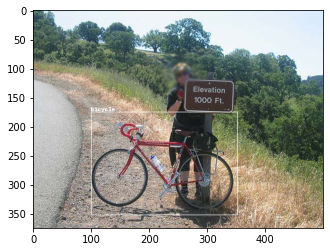

In [19]:
class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("labels", "images").replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [20]:
# Read images and annotations
images = [os.path.join('images', x) for x in os.listdir('images')]
annotations = [os.path.join('labels', x) for x in os.listdir('labels') if x[-3:] == "txt"]

images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [21]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'images/train')
move_files_to_folder(val_images, 'images/val/')
move_files_to_folder(test_images, 'images/test/')
move_files_to_folder(train_annotations, 'labels/train/')
move_files_to_folder(val_annotations, 'labels/val/')
move_files_to_folder(test_annotations, 'labels/test/')